### Before jumping straight in its best to give a high level road map of how I would tackle this problem
#### 1. Import the csv data into a pandas dataframe
#### 2. Determine which columns will be necessary to use and drop ones that are unneeded 
#### 3. Locate any missing, duplicate, outdated, incomplete, inconsistent, or incorrect data
#### 4. Determine what metrics are needed with the remaining columns and transform the dataframe as such
#### 5. Determine which model to use with the dataframe and explain why you would use one model over another
#### 6. Complete preprocessing of data 
#### 7. Split data to training and testing sets
#### 8. Train model, determine accuracy
#### 9. Create function that uses model to predict temperature for a given day in the year 2024

In [26]:
import pandas as pd

#import data
df = pd.read_csv(r"C:\Users\tarik\OneDrive\Desktop\EarthCam_DataScience_Assignment\EarthCam_DataScience_Data.csv")

In [27]:
#validate import
df.head()

,ObservedAt,ObservedAt_DateTime,Station,Record,ID,datetime,Temperature,Dewpoint,FeelsLike,HeatIndex,...,ConditionType,CloudCondition,CloudReport,Visibility,Clouds,Lightning,SunInfo,MoonInfo,raw,daily_total_precipitation
0,1525172100,5/1/2018 5:55,KJOT,011055Z AUTO 19004KT 10SM CLR 13/03 A3000 RMK ...,220160752,"{'timezone': 'America/Chicago', 'string_local'...","{'Fahrenheit': 55, 'Celsius': 13}","{'Fahrenheit': 37, 'Celsius': 3}","{'Type': None, 'Fahrenheit': 55, 'Celsius': 13}","{'Fahrenheit': None, 'Celsius': None}",...,Clear,Clear Skies,Clear Skies,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'...","[{'Condition': 'Clear Skies', 'Coverage': '0',...",[],"{'IsSunUp': True, 'Sunrise': {'timezone': 'Ame...","{'Phase': 0.5463872867481452, 'PhaseName': 'Fu...",AUTO 19004KT 10SM CLR 13/03 A3000 RMK AO2 T013...,NaN
1,1525193700,5/1/2018 11:55,KJOT,011655Z AUTO 23013G23KT 10SM SCT065 27/11 A299...,220215015,"{'timezone': 'America/Chicago', 'string_local'...","{'Fahrenheit': 81, 'Celsius': 27}","{'Fahrenheit': 52, 'Celsius': 11}","{'Type': None, 'Fahrenheit': 81, 'Celsius': 27}","{'Fahrenheit': None, 'Celsius': None}",...,Cloudy,Scattered,Scattered,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'...","[{'Condition': 'Scattered', 'Coverage': '3/8 -...",[],"{'IsSunUp': True, 'Sunrise': {'timezone': 'Ame...","{'Phase': 0.5544029020570569, 'PhaseName': 'Fu...",AUTO 23013G23KT 10SM SCT065 27/11 A2999 RMK AO...,NaN
2,1525215300,5/1/2018 17:55,KJOT,012255Z AUTO 19012G20KT 10SM CLR 28/09 A2991 R...,220262557,"{'timezone': 'America/Chicago', 'string_local'...","{'Fahrenheit': 82, 'Celsius': 28}","{'Fahrenheit': 48, 'Celsius': 9}","{'Type': None, 'Fahrenheit': 82, 'Celsius': 28}","{'Fahrenheit': None, 'Celsius': None}",...,Clear,Clear Skies,Clear Skies,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'...","[{'Condition': 'Clear Skies', 'Coverage': '0',...",[],"{'IsSunUp': True, 'Sunrise': {'timezone': 'Ame...","{'Phase': 0.5623766330324756, 'PhaseName': 'Fu...",AUTO 19012G20KT 10SM CLR 28/09 A2991 RMK AO2 T...,NaN
3,1525236900,5/1/2018 23:55,KJOT,020455Z AUTO 20013G18KT 10SM CLR 23/11 A2994 R...,220311850,"{'timezone': 'America/Chicago', 'string_local'...","{'Fahrenheit': 73, 'Celsius': 23}","{'Fahrenheit': 52, 'Celsius': 11}","{'Type': None, 'Fahrenheit': 73, 'Celsius': 23}","{'Fahrenheit': None, 'Celsius': None}",...,Clear,Clear Skies,Clear Skies,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'...","[{'Condition': 'Clear Skies', 'Coverage': '0',...",[],"{'IsSunUp': False, 'Sunrise': {'timezone': 'Am...","{'Phase': 0.5703094498618421, 'PhaseName': 'Wa...",AUTO 20013G18KT 10SM CLR 23/11 A2994 RMK AO2 T...,NaN
4,1525258500,5/2/2018 5:55,KJOT,021055Z AUTO 21008KT 10SM CLR 21/11 A2991 RMK ...,220363232,"{'timezone': 'America/Chicago', 'string_local'...","{'Fahrenheit': 70, 'Celsius': 21}","{'Fahrenheit': 52, 'Celsius': 11}","{'Type': None, 'Fahrenheit': 70, 'Celsius': 21}","{'Fahrenheit': None, 'Celsius': None}",...,Clear,Clear Skies,Clear Skies,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'...","[{'Condition': 'Clear Skies', 'Coverage': '0',...",[],"{'IsSunUp': True, 'Sunrise': {'timezone': 'Ame...","{'Phase': 0.5782024918339819, 'PhaseName': 'Wa...",AUTO 21008KT 10SM CLR 21/11 A2991 RMK AO2 T020...,NaN


In [28]:
#since the end product is solely focused on temperature, that should be the focal point of our analysis
#furthermore, the assignment specifically mentions to use a 'simple' ML model
#the addition of features would become far too complicated for this assignments' allotted 10 hour time block
#therefore, I will only use the Temperature and ObservedAt_DateTimen column for the assignment

In [29]:
#drop all columns but the two aforementioned 
df = df[['ObservedAt_DateTime', 'Temperature']]
df.head()

,ObservedAt_DateTime,Temperature
0,5/1/2018 5:55,"{'Fahrenheit': 55, 'Celsius': 13}"
1,5/1/2018 11:55,"{'Fahrenheit': 81, 'Celsius': 27}"
2,5/1/2018 17:55,"{'Fahrenheit': 82, 'Celsius': 28}"
3,5/1/2018 23:55,"{'Fahrenheit': 73, 'Celsius': 23}"
4,5/2/2018 5:55,"{'Fahrenheit': 70, 'Celsius': 21}"


In [30]:
#count number of missing values from dataframe
df.isna().sum()

ObservedAt_DateTime    0
Temperature            0
dtype: int64

In [31]:
import ast

#no missing values, perhaps there will be outliers in terms of temperature
#to visualize this, we will look at the outliers within the boxplot
#to make this easier, we will separate F and C into their own separate columns for analysis

#use ast.literal_eval and apply to evaluate temperature as a dictionary rather than a string
df['Temperature'] = df['Temperature'].map(lambda x: ast.literal_eval(x))
temp_df = df['Temperature'].apply(pd.Series)

result_df = pd.concat([df.drop(['Temperature'], axis=1), temp_df], axis=1)

result_df.head()

,ObservedAt_DateTime,Fahrenheit,Celsius
0,5/1/2018 5:55,55,13
1,5/1/2018 11:55,81,27
2,5/1/2018 17:55,82,28
3,5/1/2018 23:55,73,23
4,5/2/2018 5:55,70,21


<Axes: ylabel='Fahrenheit'>

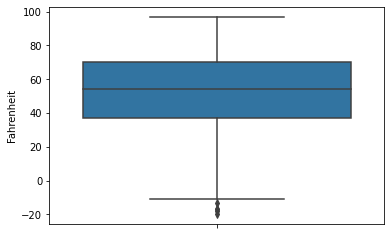

In [32]:
import seaborn as sns 
sns.boxplot(data = result_df, y = 'Fahrenheit')

<Axes: ylabel='Celsius'>

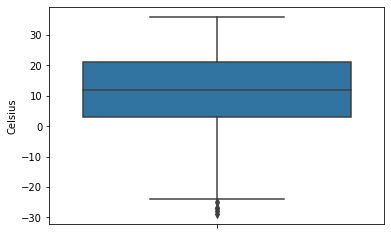

In [33]:
sns.boxplot(data = result_df, y = 'Celsius')

In [34]:
#both of the above boxplots do not seem to have any egrigious outliers present
#furthermore, the IQR, mean, outliers, and whiskers all correspond to each other, meaning the temps are being properly converted
#we can continue our data validation by determining if there are any dates not in the years 2018 - 2023 

#convert column to pd datetime
result_df['ObservedAt_DateTime'] = pd.to_datetime(result_df['ObservedAt_DateTime'], format='%m/%d/%Y %H:%M')

#make a simple boolean mask to flag dates outside the range
mask = (result_df['ObservedAt_DateTime'].dt.year < 2018) | (result_df['ObservedAt_DateTime'].dt.year > 2023)

out_of_range_dates = result_df[mask]

print(out_of_range_dates)

Empty DataFrame
Columns: [ObservedAt_DateTime, Fahrenheit, Celsius]
Index: []


In [35]:
import pandas as pd

#no dates are out of range, we can begin preprocessing data and soon decide on an ML model to use 
#it seems that the data takes a temperature reading 4 times a day every 6 hours
#in terms of data for a model, all we need is the average temperature per day, and its min and max variations

#group the data by date
result_df['Date'] = result_df['ObservedAt_DateTime'].dt.date
grouped_df = result_df.groupby('Date')

#calculate the mean, min, and max temperatures for each day
mean_temp = grouped_df[['Fahrenheit', 'Celsius']].mean().reset_index()
min_temp = grouped_df[['Fahrenheit', 'Celsius']].min().reset_index()
max_temp = grouped_df[['Fahrenheit', 'Celsius']].max().reset_index()

#aggregate the data to have a daily summary for each day 
daily_summary = pd.concat([mean_temp, min_temp[['Fahrenheit', 'Celsius']], max_temp[['Fahrenheit', 'Celsius']]], axis=1)
daily_summary.columns = ['Date', 'Fahrenheit_mean', 'Celsius_mean', 'Fahrenheit_min', 'Celsius_min', 'Fahrenheit_max', 'Celsius_max']

daily_summary.head()

,Date,Fahrenheit_mean,Celsius_mean,Fahrenheit_min,Celsius_min,Fahrenheit_max,Celsius_max
0,2018-05-01,72.75,22.75,55,13,82,28
1,2018-05-02,76.50,24.75,70,21,82,28
2,2018-05-03,69.25,20.75,64,18,73,23
3,2018-05-04,67.50,19.75,61,16,75,24
4,2018-05-05,68.75,20.50,50,10,82,28


# Deciding on a model 
- In terms of what ML model to use, I have decided to use a type of ARIMA model for time series forecasting provided by the pmdarima library
- I will now go over what the model is, the pros and cons of using this model, and why I have decided against using other models
    - ARIMA stands for auto regressive integrated moving average and at the highest level, it is used forecast future values based on past values
    - The model is dependent on the assumption that the current value of a time series depends on its previous values 
    
- Pros: 
    - Very flexible and can be used for a wide variety of time series data (like temperature forecasting)
    - Can account for various patterns, such as linear/non-linear trends volatility, and seasonal fluctuations
    - Very simple to implement and interpret, as they only require a few parameters and assumptions 
    
- Cons: 
    - Not suitable for multivariable time series data (like humidity, dew point, weather, etc...)
        - We can only use one feature rather than n-features, which makes this model limited to only forecasting based on past temperature
    - Cannot capture correlations between features:
        - If we plot a correlation matrix between temperature and other factors like humidity and dew point, they would more than likely be highly dependent on one another
    - ARIMA models assume that the data is normally distributed with constant variance, which we will have to determine through preprocessing, as you need to check the stationarity, autocorrelation, and partial autocorrelation of the data,
    
### Why not use random forest? 

- If time was not an issue, I believe that a random forest model is the most prudent to utilize in this situation 
- A random forest builds a forest with an ensemble of decision trees:
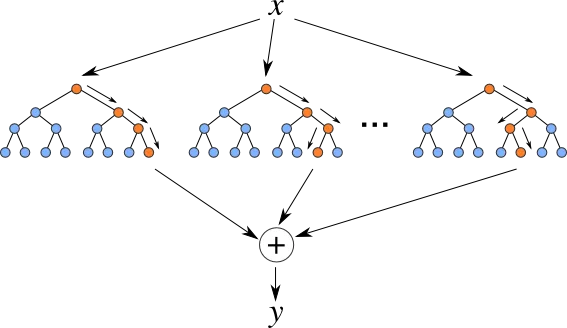

- Pros: 
    - Can be used for both classification and regression tasks (like temperature forecasting)
    - Work with both categorical and numerical data without the need for scaling nor transforming 
    - Random Forests implicitly perform feature selection and generate uncorrelated decision trees. 
        - It does this by choosing a random set of features to build each decision tree. 
        - This also makes it a great model when you have to work with a high number of features in the data.
    - Provide high accuracy as the model is built to average results as well as implicitly average variance based on decision trees
 
- Cons: 
    - Random Forests are not easily interpretable. They provide feature importance but it does not provide complete visibility into the coefficients as linear regression.
    - Random Forests can be computationally intensive for large datasets.
    - Random Forests are also very time intensive to train especially with a dataset that has a large number of features

## ARIMA Models are specified by three order parameters: (p, d, q),

    - Where,
        - p is the order of the AR term
        - q is the order of the MA term
        - d is the number of differencing required to make the time series stationary
        
- AR(p) Autoregression – a regression model that utilizes the dependent relationship between a current observation and observations over a previous period. An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series.
- I(d) Integration – uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.
- MA(q) Moving Average – a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.

- **Issues with the plain ARIMA model:**
    - The plain ARIMA model has a problem, it does not support seasonality.
    - Since our time series most definitely has seasonality (see below), then we should go for the Seasonal ARIMA model (SARIMA) which uses seasonal differencing.
    - Seasonal differencing is similar to regular differencing, but, instead of subtracting consecutive terms, we subtract the value from previous season.
    - So, the model will be represented as SARIMA(p,d,q)x(P,D,Q), where, P, D and Q are SAR, order of seasonal differencing and SMA terms respectively and 'x' is the frequency of the time series. If the model has well defined seasonal patterns, then enforce D=1 for a given frequency ‘x’.
    - We should set the model parameters such that D never exceeds one. And the total differencing ‘d + D’ never exceeds 2. We should try to keep only either SAR or SMA terms if the model has seasonal components.

<Axes: >

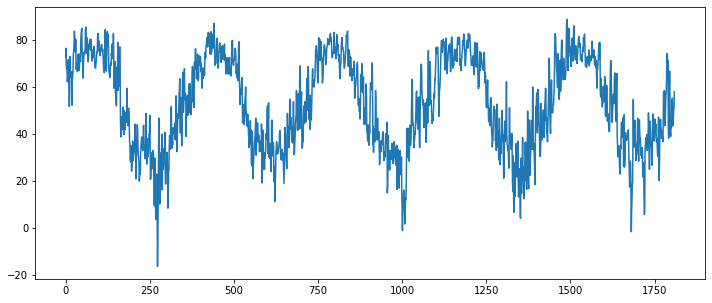

In [11]:
import matplotlib.pyplot as plt 

#now that we have our target dataframe, we need to determine if the data is seasonal or not
#any time series data that has to be modeled needs to be seasonal
#seasonal means that it’s statistical properties are more or less constant with time
#specifically, we are looking for a constant mean, constant variance, and no seasonality 
#since we are only interested in temperature, lets plot that column 

daily_summary['Fahrenheit_mean'].plot(figsize=(12,5))

In [12]:
#from the chart, we can see that the mean is around 50 and that seasonality is present

In [13]:
from statsmodels.tsa.stattools import adfuller

#the p-value is used as an indicator to determine if the data are stationary, p<0.05 = stationary, p>0.05 = non-stationary
#with our p-value being 0.12, we now know that the data are non-stationary

result=adfuller(daily_summary['Fahrenheit_mean'])
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -2.472723
p-value: 0.122253
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


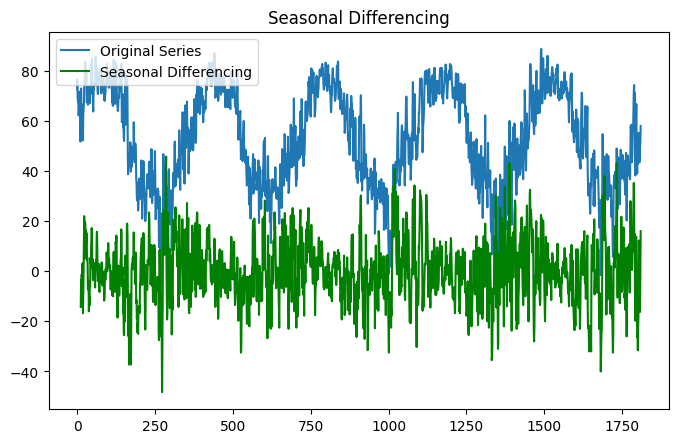

In [14]:
# Plot
fig, ax = plt.subplots(figsize=(8,5), dpi=100)

ax.plot(daily_summary['Fahrenheit_mean'], label='Original Series')
ax.plot(daily_summary['Fahrenheit_mean'].diff(12), label='Seasonal Differencing', color='green')
ax.set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [15]:
#we can see that, the seasonal spikes are intact after applying usual differencing (lag 1) 
#whereas, it is rectified after seasonal differencing
#now, let’s build the SARIMA model using pmdarima‘s auto_arima()
#to do so, we need to set seasonal=True, set the frequency m=12 for month wise series and enforce D=1

import pmdarima as pm

smodel = pm.auto_arima(daily_summary['Fahrenheit_mean'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=7.43 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=14134.291, Time=0.22 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=12420.307, Time=2.50 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=12783.040, Time=2.97 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=14132.457, Time=0.13 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=12975.713, Time=0.58 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=12259.708, Time=12.35 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=32.27 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=13.23 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=13868.085, Time=8.36 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=12241.764, Time=14.38 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=12390.925, Time=3.70 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=38.77 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=15.19 sec
 ARIMA(3,0,0)(2,1,0)[12] inte

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1810
Model:             SARIMAX(2, 0, 2)x(2, 1, [], 12)   Log Likelihood               -6056.636
Date:                             Mon, 19 Jun 2023   AIC                          12127.272
Time:                                     02:31:20   BIC                          12165.733
Sample:                                          0   HQIC                         12141.470
                                            - 1810                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3742      0.045     30.677      0.000       1.286       1.462
ar.L2         -0.3891      0.042     -9.360      0.000      -0.471      -0.308
ma.L1         -0.5204      0.044    -11.869      0.000      -0.606      -0.434
ma.L2         -0.3140      0.027    -11.792      0.000      -0.366      -0.262
ar.S.L12      -0.7159      0.021    -33.751      0.000      -0.757      -0.674
ar.S.L24      -0.3439      0.021    -16.689      0.000      -0.384      -0.304
sigma2        49.1541      1.371     35.858      0.000      46.467      51.841
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                69.13
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                            -0.08
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

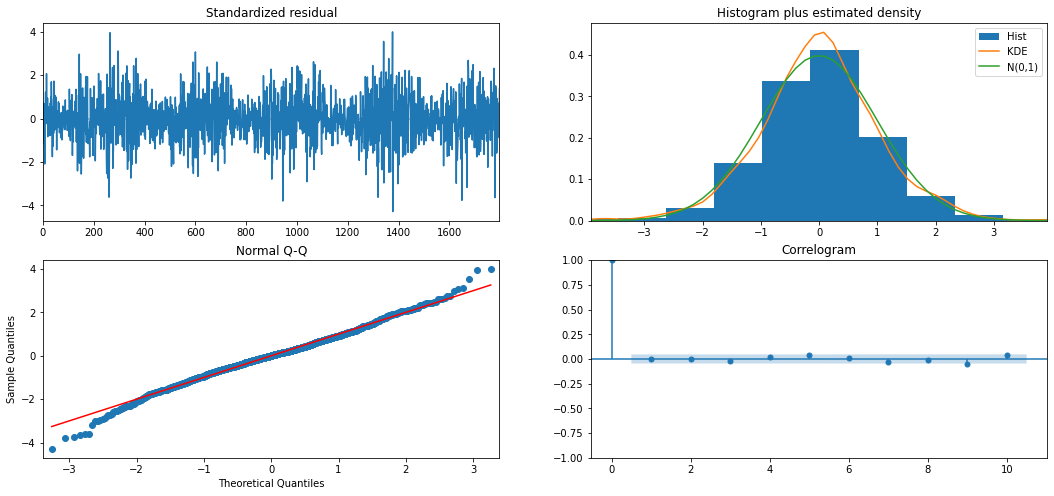

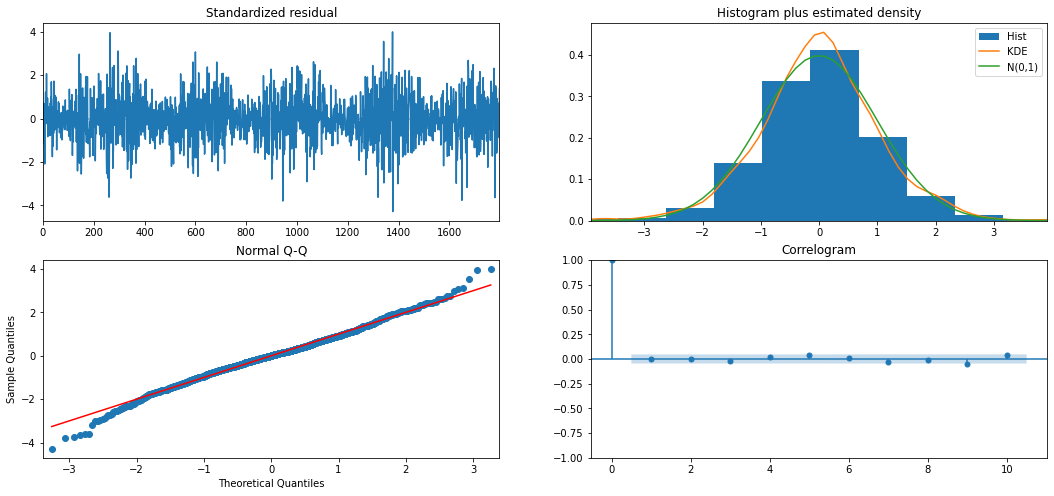

In [16]:
#we see that the Best model: ARIMA(2,0,2)(2,1,0)[12] with a significant level less than 0.05 and a lower AIC score
#once we have a fitted model to the data, it is necessary to check the residual plots to verify the validity of the model fit
#a good forecasting method will yield residuals with the following properties:
#1. the residuals are uncorrelated: if there are correlations between residuals, then there is information left in the residuals that should be used in computing forecasts
#2. the residuals have zero mean: if the residuals have a mean other than zero, then the forecasts are biased

smodel.plot_diagnostics(figsize=(18, 8))

In [42]:
#as we can see from the image above, the residuals are uncorrelated and have zero mean 
#hence we can say the model is fitted well
test = daily_summary.iloc[-30:]
train = daily_summary.iloc[:-30]

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

daily_summary.set_index('Date', inplace=True)

#create and fit the SARIMA model
model = SARIMAX(train['Fahrenheit_mean'], order=(2, 0, 2), seasonal_order=(2, 1, 0, 12))
results = model.fit()

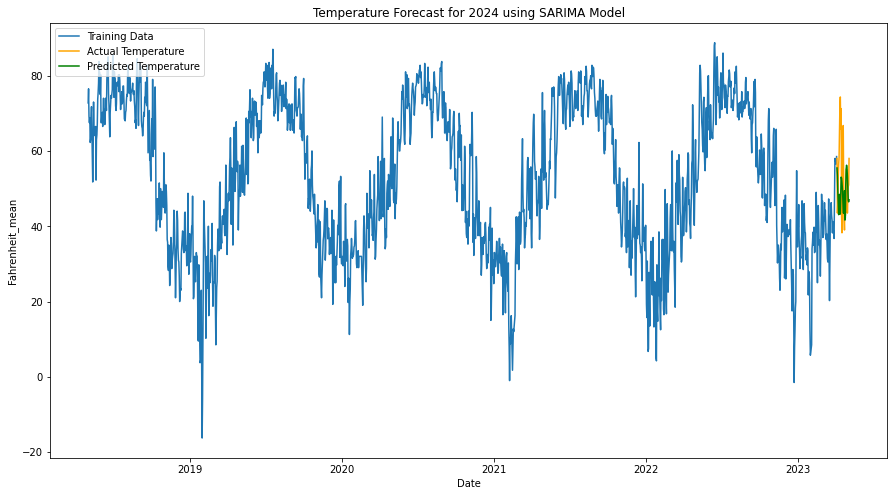

In [43]:
forecast = results.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean

# Step 6: Plot the results
plt.figure(figsize=(15, 8))
plt.plot(train.index, train['Fahrenheit_mean'], label='Training Data')
plt.plot(test.index, test['Fahrenheit_mean'], label='Actual Temperature', color='orange')
plt.plot(test.index, forecast_mean, label='Predicted Temperature', color='green')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Fahrenheit_mean')
plt.title('Temperature Forecast for 2024 using SARIMA Model')
plt.show()

In [45]:
#forecast the temperature for the year 2024
test_2024 = daily_summary.iloc[-30:]
train_2024 = daily_summary.iloc[:-30]
forecast_2024 = results.get_forecast(steps=len(test))
forecast_mean_2024 = forecast.predicted_mean

In [46]:
#forecasting for the year 2024
forecast_steps = 365 + (365 - len(test_2024))
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean

#F to C function
def fahrenheit_to_celsius(fahrenheit):
    celsius = (fahrenheit - 32) * 5/9
    return celsius

In [47]:
#saving the forecasted temps to a dataframe
date_range_2024 = pd.date_range('2024-01-01', periods=365, freq='D')

forecast_2024 = pd.DataFrame(data={'Fahrenheit_mean': forecast_mean[-365:].values}, index=date_range_2024)
forecast_2024['Celsius_mean'] = forecast_2024['Fahrenheit_mean'].apply(fahrenheit_to_celsius)

forecast_2024.to_csv('forecast_2024.csv')

print(forecast_2024.head())

            Fahrenheit_mean  Celsius_mean
2024-01-01        61.666683     16.481491
2024-01-02        60.210187     15.672326
2024-01-03        58.062840     14.479356
2024-01-04        54.883090     12.712828
2024-01-05        51.362600     10.757000


In [48]:
#function that takes in index of dataframe as 'day', and returns row of the input
def get_temperature_by_day(day):
    if not 0 <= day <= 365:
        raise ValueError("Please provide a day as an integer between 0 and 365.")
    
    row = forecast_2024.iloc[day]
    return row

get_temperature_by_day(150)

Fahrenheit_mean    51.834729
Celsius_mean       11.019294
Name: 2024-05-30 00:00:00, dtype: float64